# **Data Science and business Analytics (The Sparks Foundation - June 21')**
## **Task 6 Prediction using Decision Tree Algorithm**
### **Author - Jagdish Kharatmol**
 Create the Decision Tree classifier and visualize it graphically.

 Classify new flower as belonging to one of the 3 classes present in the data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt

df=pd.read_csv("Iris.csv")

In [16]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.drop(columns=["Id"],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

([<matplotlib.axis.XTick at 0x7fdeacf99690>,
 [Text(0, 0, 'Iris-setosa'),
  Text(0, 0, 'Iris-versicolor'),
  Text(0, 0, 'Iris-virginica')])

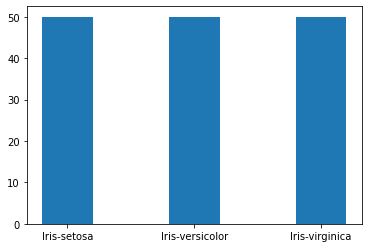

In [20]:
labels=df["Species"].unique()
x=[1,2,3]
y=df['Species'].value_counts()
plt.bar(x,y,width=0.4)
plt.xticks(x, labels)

In [21]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


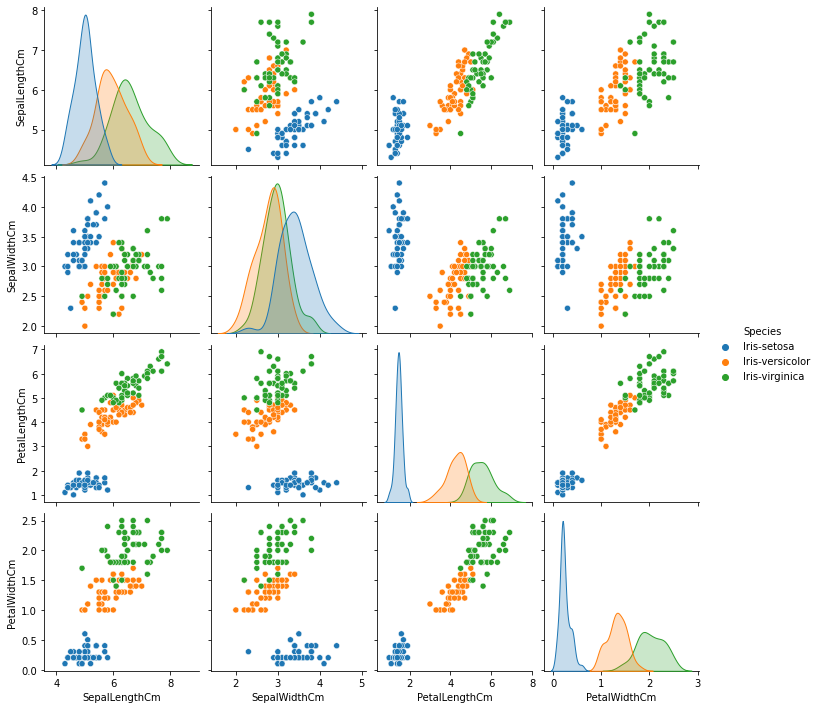

In [22]:
sns.pairplot(df,hue='Species')

Text(0.5, 1.0, 'Sepal dimension')

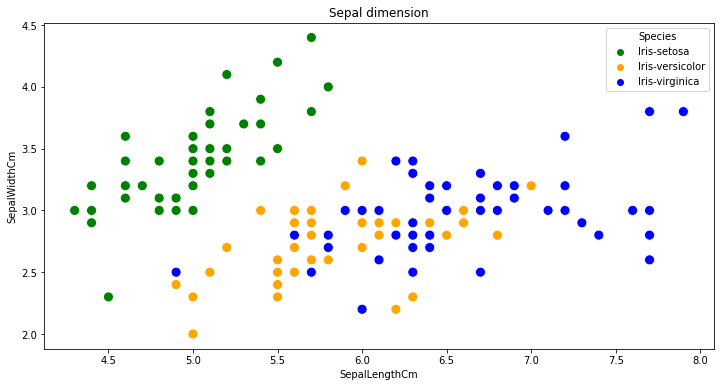

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"],hue=df["Species"],palette=["green","orange","blue"],s=100)
plt.title("Sepal dimension")

Text(0.5, 1.0, 'Petal dimension')

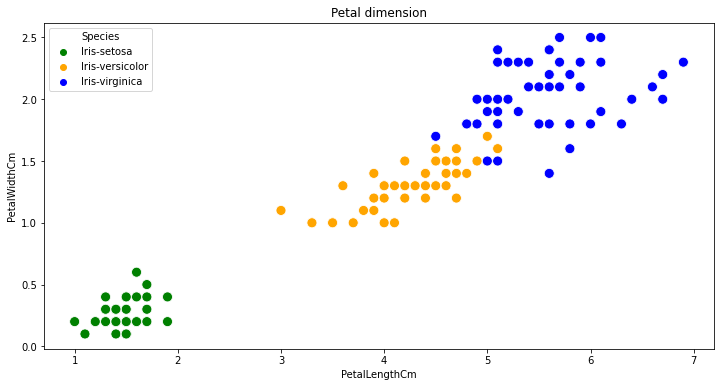

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"],hue=df["Species"],palette=["green","orange","blue"],s=100)
plt.title("Petal dimension")

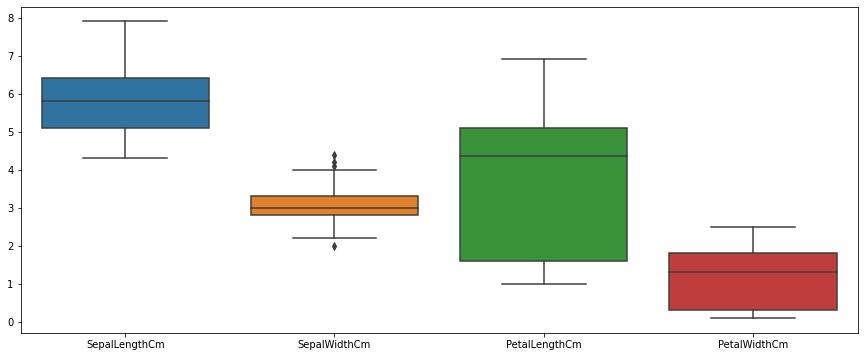

In [25]:
#outliers
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

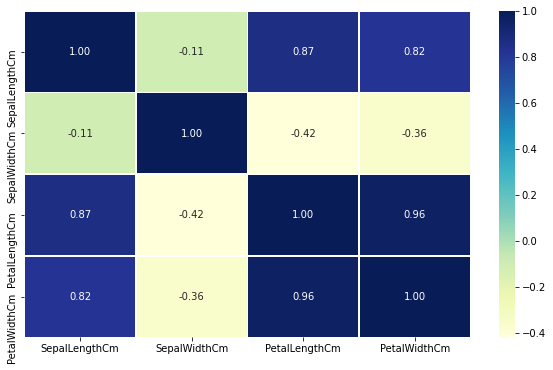

In [26]:
corr_matrix=df.corr()
plt.figure(figsize = (10,6))
ax=sns.heatmap(corr_matrix,
               annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [27]:
from sklearn.model_selection import train_test_split

x=df.drop(columns=['Species'])
y=df['Species']

Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2, random_state=0)


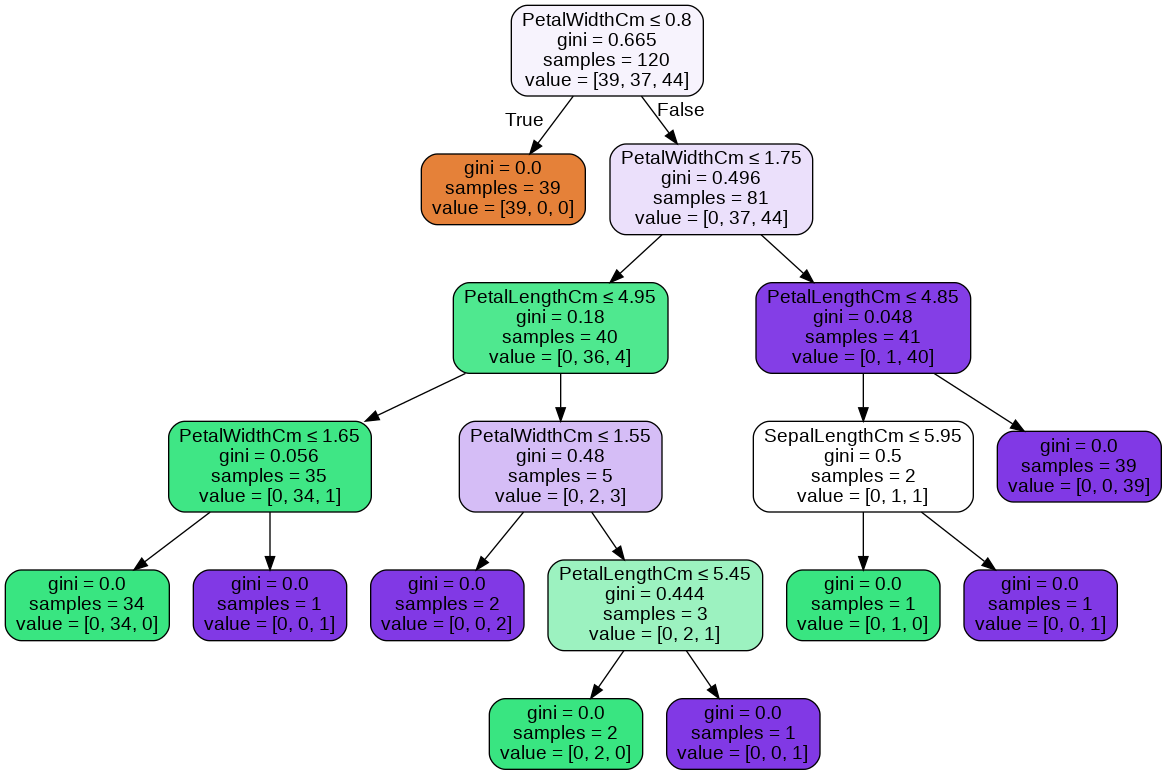

In [28]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


dt=DecisionTreeClassifier()
dt.fit(Xtrain,Ytrain)
y_pred=dt.predict(Xtest)


dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
result=dt.predict([[5.1,3.5,1.4,0.2]])
print(f'The Species is {result[0]}')

The Species is Iris-setosa


In [30]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
